In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
with open("./data/hungarian_text_0.txt", encoding="utf-8") as f:
    text = f.read()

In [6]:
print(text[:1000])

2DIN fejegység - Pilisszentlászló - 2DIN - 2DIN fejegység, 2DIN navigáció, 2DIN kamera
Keresőoptimalizált bérelhető weboldal készítés kontra saját weboldal
Az elmúlt időszakban megnövekedett az igény a céges bemutatkozó weboldalakra, valamint a webáruházakra, hiszen egyre kevesebb az a szolgáltató vagy termékeket értékesítő, aki online jelenlét hiányában is képes lenne hosszútávon fennmaradni. A cégek két irányban tudnak gondolkodni: saját vagy bérelhető weboldalban. Sok éve foglalkozom keresőoptimalizált bérelhető weboldal készítéssel, valamint természetesen olyan honlapokkal is, amelyek átadás után véglegesen a vevő tulajdonában maradnak. Az évek során több 100 bemutatkozó honlapot és webáruházat adtam át sikeresen, így jól látom, mikor, melyik lehetőséget érdemesebb inkább választani.
Az alábbi sorokkal bízom benne, hogy segíthetek döntést hozni abban, hogy saját weboldalt nyiss vagy inkább keresőoptimalizált bérelhető weboldal készítés szolgáltatást válassz.
A keresőoptimalizált we

C:\Users\takat\AppData\Local\Temp\ipykernel_37020\3773810810.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot([len(i) for i in text[:10000000].splitlines() if len(i) < 300 and len(i) > 40],  palette="mako")


Text(0.5, 1.0, 'Histogram of line lengths')

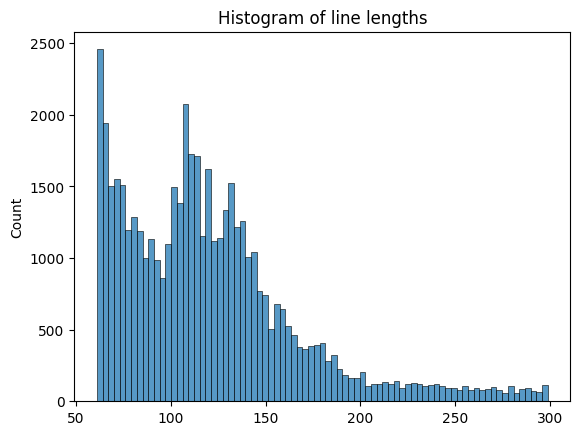

In [34]:
sns.histplot([len(i) for i in text[:10000000].splitlines() if len(i) < 300 and len(i) > 40],  palette="mako")
plt.title("Histogram of line lengths")

C:\Users\takat\AppData\Local\Temp\ipykernel_37020\1199732880.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot([len(i) for i in text[:10000000].splitlines() if len(i) < 3000 and len(i) > 100],  palette="mako", log_scale=True)


Text(0.5, 1.0, 'Histogram of line lengths (log)')

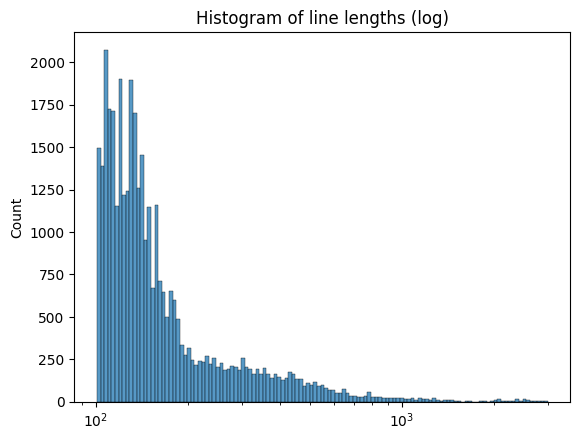

In [31]:
sns.histplot([len(i) for i in text[:10000000].splitlines() if len(i) < 3000 and len(i) > 100],  palette="mako", log_scale=True)
plt.title("Histogram of line lengths (log)")

In [39]:
print(f"Mean string length: {np.mean([len(i) for i in text[:100000].splitlines()])}")
print(f"Max string length: {np.max([len(i) for i in text[:100000].splitlines()])}")
print(f"Min string length: {np.min([len(i) for i in text[:100000].splitlines()])}")

Mean string length: 221.22444444444446
Max string length: 6109
Min string length: 61


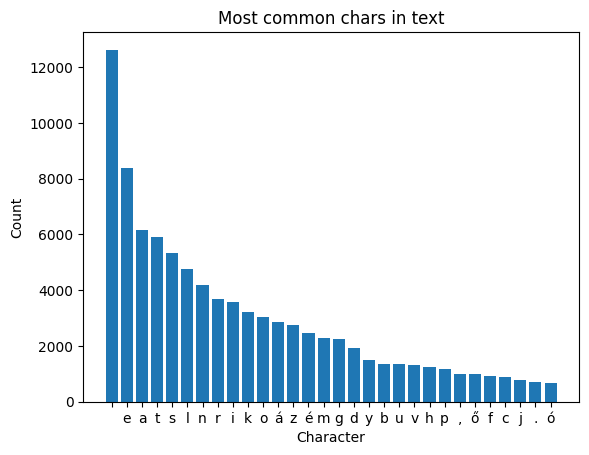

In [23]:
import collections
TOP_K = 30

# Count the occurrences of each character
counter = collections.Counter(text[:100000])

# Get the characters and their counts as separate lists
characters = list(counter.keys())
counts = list(counter.values())

# Sort the characters and counts in descending order
indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
characters = [characters[i] for i in indices]
counts = [counts[i] for i in indices]

# Plot the result
plt.bar(characters[:TOP_K], counts[:TOP_K])
plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Most common chars in text")
plt.show()


c:\Users\takat\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\takat\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


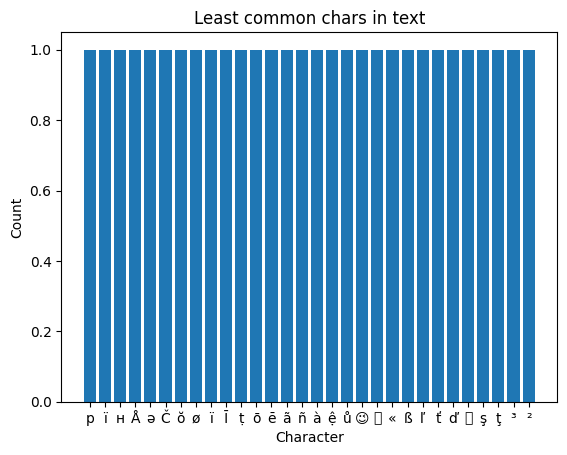

In [24]:
# Plot the result
plt.bar(characters[-TOP_K:], counts[-TOP_K:])
plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Least common chars in text")
plt.show()

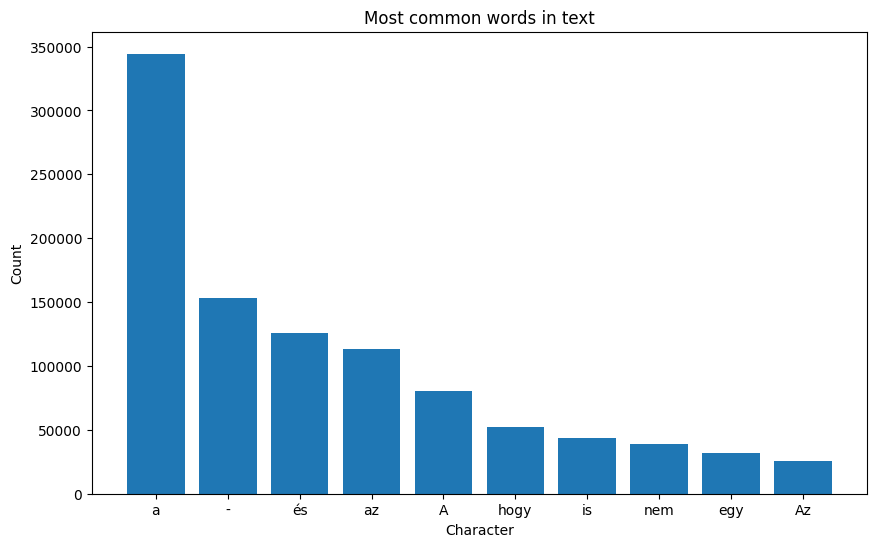

In [41]:
TOP_K = 10

# Count the occurrences of each character
counter = collections.Counter(text[:100000000].split())

# Get the characters and their counts as separate lists
characters = list(counter.keys())
counts = list(counter.values())

# Sort the characters and counts in descending order
indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
characters = [characters[i] for i in indices]
counts = [counts[i] for i in indices]

plt.figure(figsize=(10, 6))
# Plot the result
sns.bar(characters[:TOP_K], counts[:TOP_K])

plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Most common words in text")
plt.show()

In [53]:
from datasets import load_dataset

dataset = load_dataset('text', data_dir="data", streaming=True)


Using custom data configuration default-12d058f59feabf05


In [55]:
dataset

{'train': <datasets.iterable_dataset.IterableDataset at 0x22eadf6bc10>}

In [56]:
dataset = load_dataset('text', data_dir="data")


Using custom data configuration default-12d058f59feabf05
Found cached dataset text (C:/Users/takat/.cache/huggingface/datasets/text/default-12d058f59feabf05/0.0.0/21a506d1b2b34316b1e82d0bd79066905d846e5d7e619823c0dd338d6f1fa6ad)
100%|██████████| 1/1 [00:00<00:00, 30.41it/s]


In [57]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 496178
    })
})

In [64]:
from huggingface_hub import notebook_login


In [68]:
notebook_login()

In [82]:
dataset = load_dataset('hakatiki/CcHuText', streaming=True)
iterator = iter(dataset["train"])

Using custom data configuration hakatiki--CcHuText-535efbcb467c1354


In [83]:
for i in range(10):
    print(next(iterator))

{'text': 'Az 5 legfontosabb HandBrake alternatíva a videó formátum konvertálásához és a DVD-fájlok másolásához'}
{'text': 'Rendeléssel kapcsolatban keresd az Ügyfélszolgálatunkat e-mailben:'}
{'text': 'Olvasónk, Csaba írása A Ganzo G 743 -as modellje ránézésre annyira jól sikerült, hogy majdnem összeveszejtett egy barátommal, aki, mivel szerinte úgyis rengeteg késem van, el merészelte kérni tőlem, pedig nem is gyűjtő. A dolog ott kezdődik, hogy nincs rengeteg késem, csak pár száz és négy kard. Ott folytatódik, hogy még azt is kicsit ...'}
{'text': 'A tudatosság tudatára ébredés: a belső csend megjelenése. Bármilyen zavaró zaj ugyanannyit segíthet, mint a csend. Ha felhagysz a zajjal szemben kialakult belső viszolygásoddal, ha hagyod azt olyannak lenni, amilyen, akkor ez az elfogadás is eljuttat a lelki béke birodalmába, ami a belső csend. Valahányszor mélyen elfogadod a jelen pillanatot olyannak, amilyen - bármilyen formában is mutatkozzék -, nyugodt vagy, lelki békét érzel. Figyelj a 